In [1]:
# customer_id:用户id ， data：购买日期， amount_product:购买产品金额， num_product：购买产品数量 

In [2]:
%cd "D:\桌面文件\大数据管理\数据挖掘实战\用户数据分析"

D:\桌面文件\大数据管理\数据挖掘实战\用户数据分析


In [2]:
%pwd

'D:\\桌面文件\\大数据管理\\数据挖掘实战\\用户数据分析'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # 允许在Jupyter Notebook中直接显示Matplotlib图形
plt.style.use('ggplot') # R语言绘图库风格

UsageError: unrecognized arguments: # 允许在Jupyter Notebook中直接显示Matplotlib图形


In [4]:
plt.rcParams['font.sans-serif']= 'SimHei'

In [5]:
#columns = ['customer_id','data','num_product','amount_product']

In [5]:
df = pd.read_table('CDNOW_master.txt',sep='\s+') # sep='\s+' 匹配任意个空格

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    69659 non-null  int64  
 1   date           69659 non-null  int64  
 2   number_of_cds  69659 non-null  int64  
 3   dollar_value   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [7]:
df.head()

,customer_id,date,number_of_cds,dollar_value
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [8]:
df.describe()
# 日期是19970101-19980630
# 初步确定异常值有99的购买数量；购买金额为0

,customer_id,date,number_of_cds,dollar_value
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
df['date']=pd.to_datetime(df['date'],format='%Y%m%d') # %Y四位年份； %y两位年份；  %h两位小时； %M两位分钟； %s两位秒

In [7]:
df['month']=df['date'].dt.to_period('M')
df

,customer_id,date,number_of_cds,dollar_value,month
0,1,1997-01-01,1,11.77,1997-01
1,2,1997-01-12,1,12.00,1997-01
2,2,1997-01-12,5,77.00,1997-01
3,3,1997-01-02,2,20.76,1997-01
4,3,1997-03-30,2,20.76,1997-03
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04
69655,23568,1997-04-22,1,14.99,1997-04
69656,23569,1997-03-25,2,25.74,1997-03
69657,23570,1997-03-25,3,51.12,1997-03


# 用户整体消费趋势分析（按月分布）

Text(0, 0.5, '售货额')

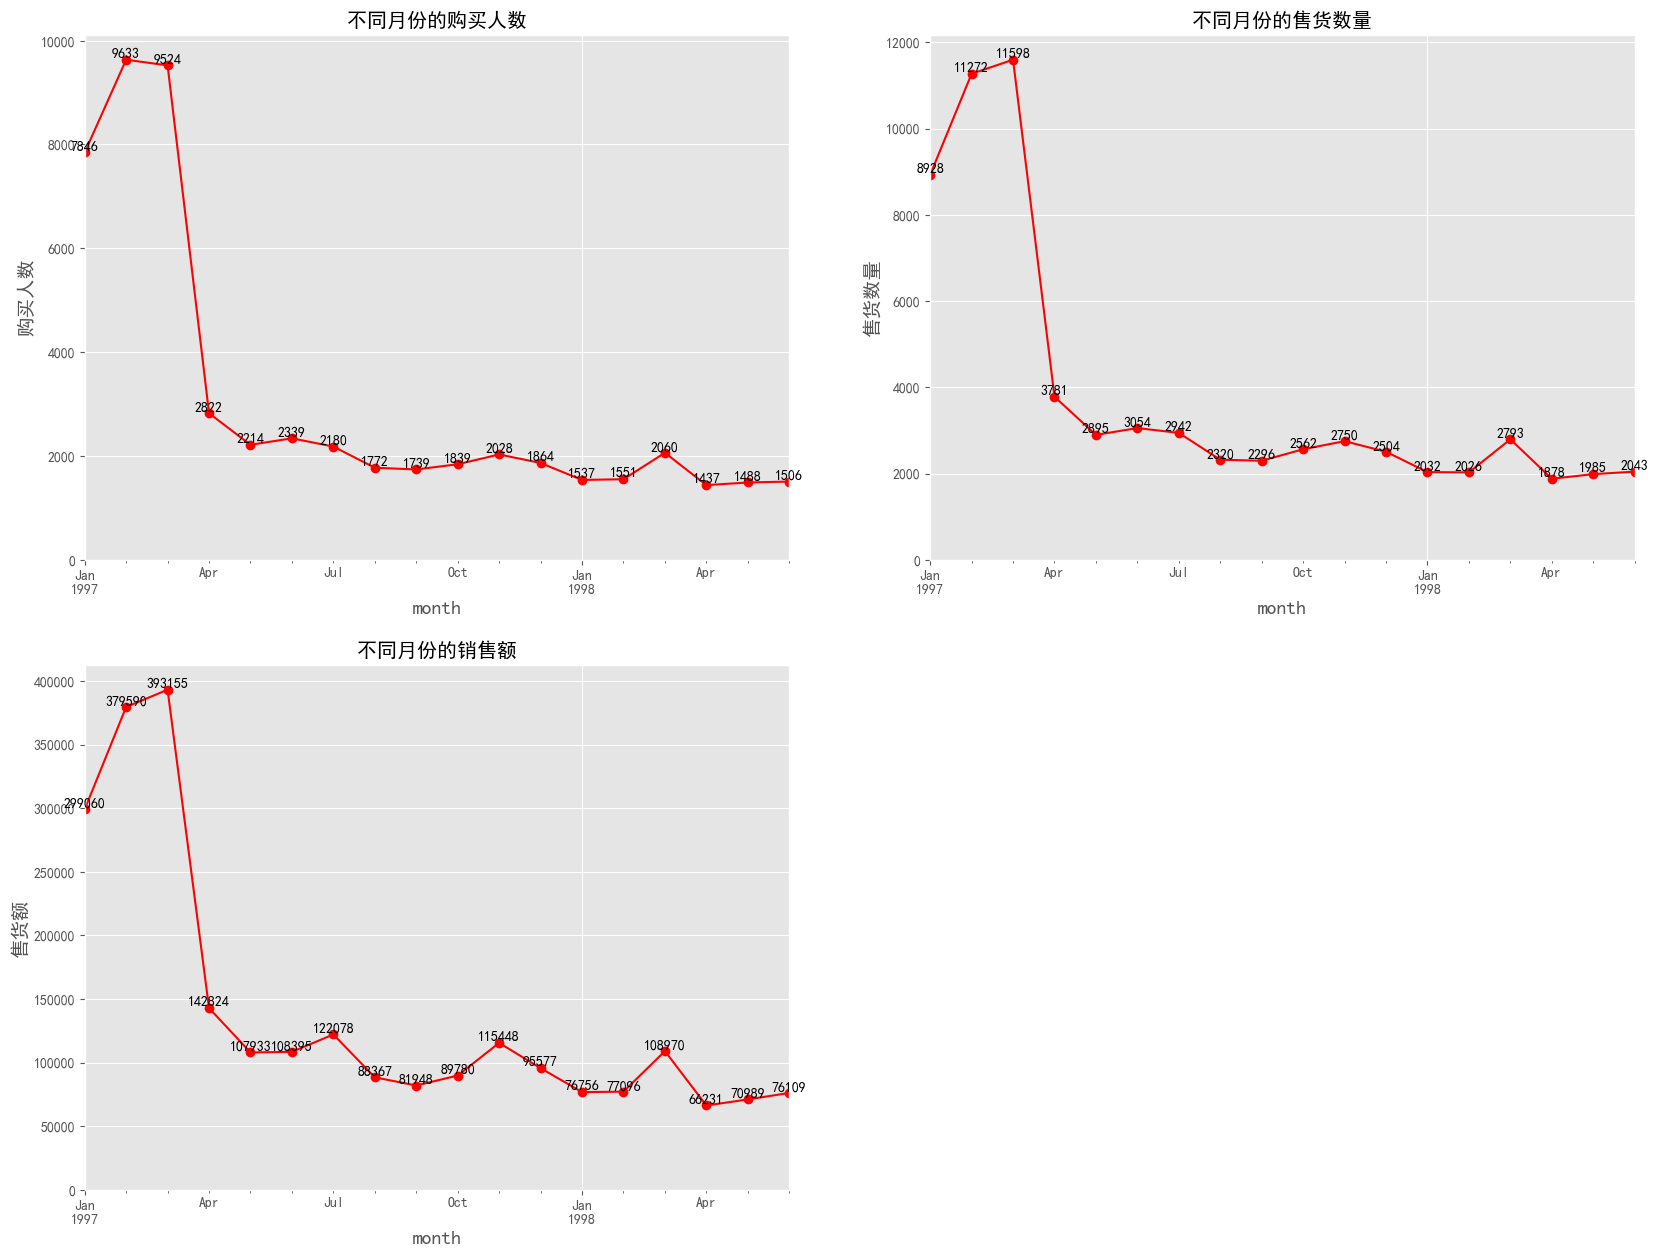

In [8]:
plt.figure(figsize=(20,15))
# 不同月份的购买人数
plt.subplot(2,2,1)
month_people= df.groupby('month')['customer_id'].apply(lambda x : len(x.drop_duplicates())) # 存在一个人购买多次的情况，对这个人数进行去重
month_people.plot(kind='bar')
month_people.plot(kind='line',color= ['r'],marker='o') # 加上折线设置颜色为红色
for i , r in enumerate(month_people):
    plt.text(month_people.index[i], r, str(int(r)), ha='center', va='bottom')
plt.title('不同月份的购买人数')
plt.xlabel('month',fontsize=14)
plt.ylabel('购买人数',fontsize=14)

# 不同月份的售货数量
plt.subplot(2,2,2)
month_num= df.groupby('month')['number_of_cds'].count()
month_num.plot(kind='bar')
month_num.plot(kind='line',color= ['r'],marker='o') # 加上折线设置颜色为红色
for i , r in enumerate(month_num):
    plt.text(month_num.index[i], r, str(int(r)), ha='center', va='bottom')
plt.title('不同月份的售货数量')
plt.xlabel('month',fontsize=14)
plt.ylabel('售货数量',fontsize=14)

# 不同月份的销售金额
plt.subplot(2,2,3)
month_amount= df.groupby('month')['dollar_value'].sum()
month_amount.plot(kind='bar')
month_amount.plot(kind='line',color= ['r'],marker='o') # 加上折线设置颜色为红色
for i , r in enumerate(month_amount):
    plt.text(month_amount.index[i], r, str(int(r)), ha='center', va='bottom')
plt.title('不同月份的销售额')
plt.xlabel('month',fontsize=14)
plt.ylabel('售货额',fontsize=14)



根据这三个图可以得出结论，这家公司的产品的销售额、销量和购买人数都在1997年2-3月这个时间段达到顶峰，然后急剧下降趋于平稳

# 用户消费分布图

<Axes: xlabel='number_of_cds', ylabel='dollar_value'>

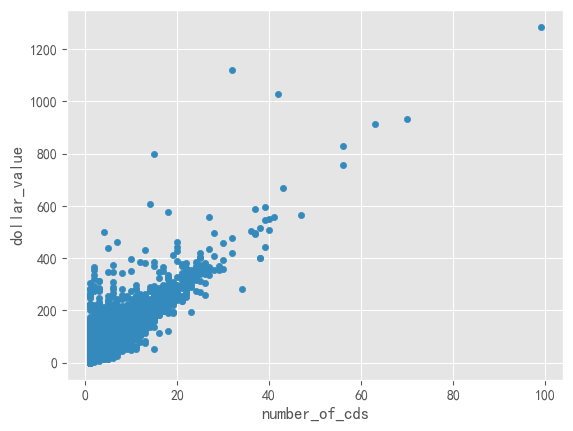

In [9]:
df.plot(kind='scatter',x='number_of_cds',y='dollar_value')

大部分都是少次购买，并且每次购买的金额不大

<Axes: ylabel='Frequency'>

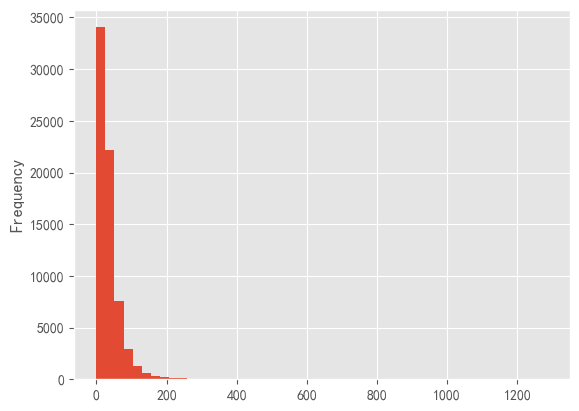

In [10]:
df['dollar_value'].plot(kind='hist',bins=50)

根据直方图可以看出，大部分人的购买金额都在0-50$

## 消费金额分布与贡献率

In [8]:
# 进行用户分组，计算贡献度
customer_amount = df.groupby('customer_id')['dollar_value'].sum().sort_values().reset_index()
# len(customer_amount[customer_amount['dollar_value']==0])
customer_amount['cum_value']= customer_amount['dollar_value'].cumsum()
amount_total = customer_amount['cum_value'].max()
customer_amount['prop'] = customer_amount.apply(lambda x : x['cum_value']/amount_total,axis=1)
customer_amount

,customer_id,dollar_value,cum_value,prop
0,10175,0.00,0.00,0.000000
1,4559,0.00,0.00,0.000000
2,1948,0.00,0.00,0.000000
3,925,0.00,0.00,0.000000
4,10798,0.00,0.00,0.000000
...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404


<Axes: >

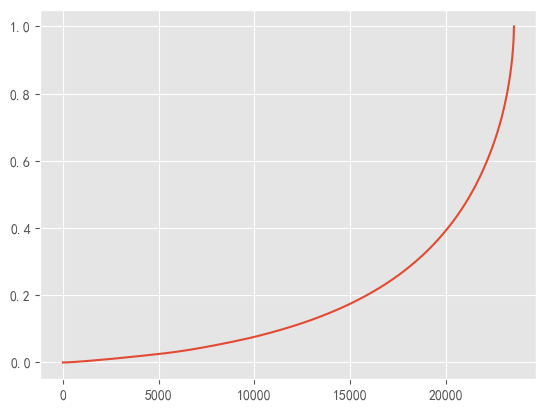

In [12]:
customer_amount['prop'].plot()

# 用户消费行为

<Axes: xlabel='date'>

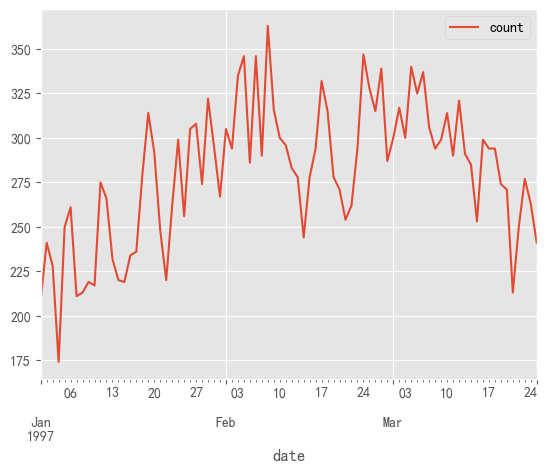

In [16]:
# 首购时间
df.groupby('customer_id')['date'].min().value_counts().reset_index().sort_values('date').plot(x='date',y='count')

<Axes: xlabel='date'>

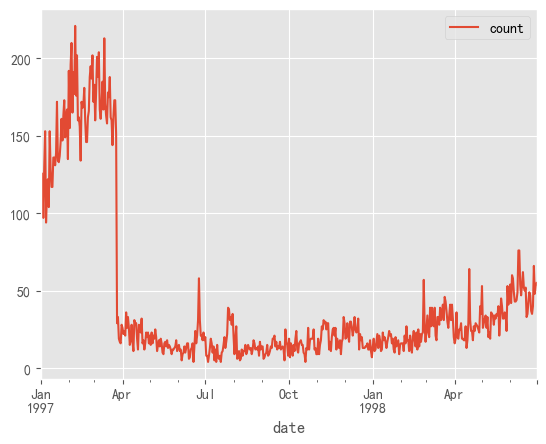

In [17]:
# 最后一次购买
df.groupby('customer_id')['date'].max().value_counts().reset_index().sort_values('date').plot(x='date',y='count')

发现最后一次购买的趋势分布与用户整体消费趋势相似
主要原因有以下几点：
1. 季节性购买行为：消费者可能在特定季节或节日期间增加购买量，这可能导致购买金额的趋势与最后一次购买时间的分布呈现出相似的模式。

2. 促销活动的影响：电商平台可能会在特定时间进行促销活动，吸引消费者在这些时期增加购买，从而影响购买金额的趋势。

3. 消费者忠诚度：如果消费者对品牌或平台有较高的忠诚度，他们可能会定期回访并进行购买，这可能导致购买金额的趋势与最后一次购买时间的分布相似。

4. 库存和新产品推出：电商平台可能会定期更新库存或推出新产品，这可能会吸引消费者在这些时期进行购买，从而影响购买金额的趋势。

5. 消费者购买习惯：一些消费者可能有固定的购买周期，比如每月或每季度购买一次，这也可能导致购买金额的趋势与最后一次购买时间的分布相似。

# 用户分层

## 构建RFM模型

In [9]:
RFM = df.pivot_table(index='customer_id',
                     values=['date','number_of_cds','dollar_value'],
                     aggfunc={'date':'max','number_of_cds':'sum','dollar_value':'sum'})
RFM.head()

,date,dollar_value,number_of_cds
customer_id,,,
1,1997-01-01,11.77,1
2,1997-01-12,89.00,6
3,1998-05-28,156.46,16
4,1997-12-12,100.50,7
5,1998-01-03,385.61,29


In [10]:
RFM['R'] = RFM['date'].max()-RFM['date']
RFM.rename(columns={'dollar_value':'M','number_of_cds':'F'},inplace=True)
# RFM=RFM.drop(columns='date')


In [11]:
#rfm计算，用每一列的值减去对应的平均值，如果大于0就设置为1，小于0就设置为0
def rfm(x):
    mean=x.mean()
    return (x-mean).apply(lambda y:1 if y>0 else 0)
RFM['m']= rfm(RFM['M'])
RFM['f']= rfm(RFM['F'])

def rfm_date(x):
    mean=x.mean()
    return (x-mean).apply(lambda y:1 if y>pd.Timedelta(0) else 0)
RFM['r']= rfm_date(RFM['R'])


In [12]:
RFM['RFM'] = RFM[['r', 'f', 'm']].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [13]:
# 再使用map函数对应
cus_tpye={
    '111':'重要价值客户',
    '011':'重要保持客户',
    '101':'重要发展客户',
    '001':'重要挽留客户',
    '110':'一般价值客户',
    '010':'一般保持客户',
    '100':'一般发展客户',
    '000':'一般挽留客户'}
RFM['客户分类'] = RFM['RFM'].map(cus_tpye)
RFM

,date,M,F,R,m,f,r,RFM,客户分类
customer_id,,,,,,,,,
1,1997-01-01,11.77,1,545 days,0,0,1,100,一般发展客户
2,1997-01-12,89.00,6,534 days,0,0,1,100,一般发展客户
3,1998-05-28,156.46,16,33 days,1,1,0,011,重要保持客户
4,1997-12-12,100.50,7,200 days,0,0,0,000,一般挽留客户
5,1998-01-03,385.61,29,178 days,1,1,0,011,重要保持客户
...,...,...,...,...,...,...,...,...,...
23566,1997-03-25,36.00,2,462 days,0,0,1,100,一般发展客户
23567,1997-03-25,20.97,1,462 days,0,0,1,100,一般发展客户
23568,1997-04-22,121.70,6,434 days,1,0,1,101,重要发展客户


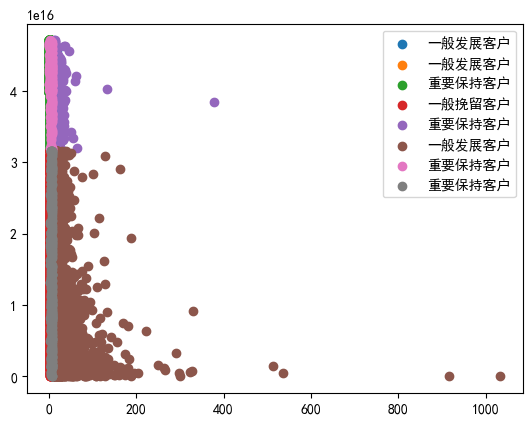

In [15]:
#客户分层可视化
for label, grouped in RFM.groupby('客户分类'):
    # print(label,grouped)
    x= grouped['F']
    y= grouped['R']
    plt.scatter(x,y)
plt.legend(RFM['客户分类'])

In [24]:
piovt_count = df.pivot_table(index='customer_id',
                             columns='month',
                             values='number_of_cds',
                             aggfunc='count').fillna(0)
piovt_count.head()

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
customer_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
avg= piovt_count.sum().sum()/len(piovt_count)
avg

2.9554094187526516

In [26]:
# 由于浮点数不一致，现在只想知道每一个客户在每个月是否有进行消费，用0，1表示
df_purchase = piovt_count.map(lambda x : 1 if x>0 else 0)
df_purchase.head()
# apply 是对dataframe的每一行或者一列进行操作
# applymap 是对dataframe中的具体每一个值进行操作
# map 本身是一个series的函数，在dataframe中无法使用map函数，map函数作用于series中的每一个元素的

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
customer_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


## 新用户、老用户、活跃用户和回流用户分析(方法1：拉通时间线站在最后那个时间点看）

In [27]:
# 判断是否是新用户，活跃用户，不活跃用户，回流用户
# 最近2个月内的新用户：只在最近两个月有购买记录的用户
# 活跃用户：大于平均购买次数的用户
# 不活跃用户：小于平均购买次数的用户
# 近二个月内的回流用户： 之前有购买过，但中间有3个月以上没有购买过产品，然后最近2个月内又进行了购买的用户
def type(data,avg):
    avg= piovt_count.sum().sum()/len(piovt_count)
    if (data[-2:].sum()>0) and (data[:-2].sum()==0):
        return '最近2个月内的新用户'
    elif data.sum() > avg :
        return '活跃用户'
    elif data.sum() <= avg:
        last_purchase_idx = data[data > 0].last_valid_index() 
        if last_purchase_idx >= data.index[-2] and data[last_purchase_idx-3:last_purchase_idx].sum()==0 and data[:last_purchase_idx-3].sum()>0:
            return '回流用户'
        else:
            return '不活跃用户'
    else:
        return '不活跃用户'

piovt_count['customer_type']=piovt_count.apply(lambda data:type(data,avg),axis=1)
piovt_count['customer_type'].value_counts()

customer_type
不活跃用户    15987
活跃用户      7583
Name: count, dtype: int64

In [63]:
piovt_count.sample(20)

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,customer_type
customer_id,,,,,,,,,,,,,,,,,,,
15749,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,不活跃用户
13721,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,不活跃用户
8723,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,不活跃用户
14304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,不活跃用户
6546,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,活跃用户
20050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,不活跃用户
6305,2.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,活跃用户
2860,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,活跃用户
14504,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,活跃用户


## 新用户、老用户、活跃用户和回流用户分析(方法2：以每个月为基准来看）

In [29]:
def active_status(data):# data是整行数据，共18列
    status = []
    for i in range(18):
        # 本月没有消费
        if data[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unactive')
                else:
                    status.append('unactive')
            pass
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] =='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns)
purchase_status = df_purchase.apply(active_status,axis=1)
purchase_status

C:\Users\29859\AppData\Local\Temp\ipykernel_13264\4102864372.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i]==0:


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
customer_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


C:\Users\29859\AppData\Local\Temp\ipykernel_13264\3082725919.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x))
C:\Users\29859\AppData\Local\Temp\ipykernel_13264\3082725919.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x))
C:\Users\29859\AppData\Local\Temp\ipykernel_13264\3082725919.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x))
C:\Users\29859\AppData\Local\Temp\ipykernel_13264\3082725919.py:1: FutureWarning: pandas.value_counts i

<Axes: xlabel='month'>

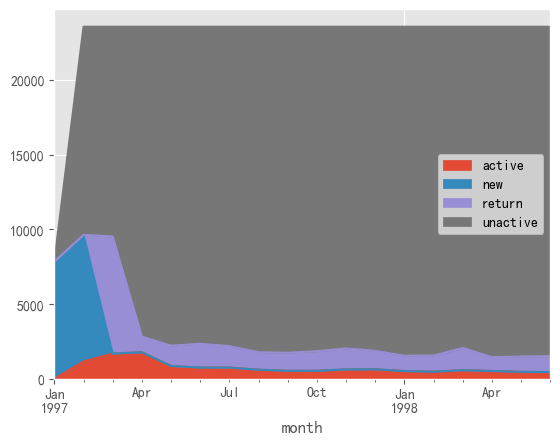

In [30]:
purchase_status_ct = purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x))
purchase_status_ct.T.fillna(0).plot.area()

活跃用户占比较少，同时每月有稳定的回流用户

In [31]:
# 回流用户占比
rate=purchase_status_ct.T.fillna(0).apply(lambda x : x/x.sum(), axis=1)
rate

,active,new,return,unactive
month,,,,
1997-01,0.000000,1.00000,0.000000,0.000000
1997-02,0.049088,0.35961,0.000000,0.591303
1997-03,0.071319,0.00000,0.332754,0.595927
1997-04,0.075223,0.00000,0.044506,0.880272
1997-05,0.036148,0.00000,0.057785,0.906067
1997-06,0.031693,0.00000,0.067543,0.900764
1997-07,0.031650,0.00000,0.060840,0.907510
1997-08,0.025626,0.00000,0.049555,0.924820
1997-09,0.022401,0.00000,0.051379,0.926220


In [36]:
rate_reindex= rate.reset_index()
rate_reindex

,month,active,new,return,unactive
0,1997-01,0.000000,1.00000,0.000000,0.000000
1,1997-02,0.049088,0.35961,0.000000,0.591303
2,1997-03,0.071319,0.00000,0.332754,0.595927
3,1997-04,0.075223,0.00000,0.044506,0.880272
4,1997-05,0.036148,0.00000,0.057785,0.906067
5,1997-06,0.031693,0.00000,0.067543,0.900764
6,1997-07,0.031650,0.00000,0.060840,0.907510
7,1997-08,0.025626,0.00000,0.049555,0.924820
8,1997-09,0.022401,0.00000,0.051379,0.926220
9,1997-10,0.022571,0.00000,0.055452,0.921977


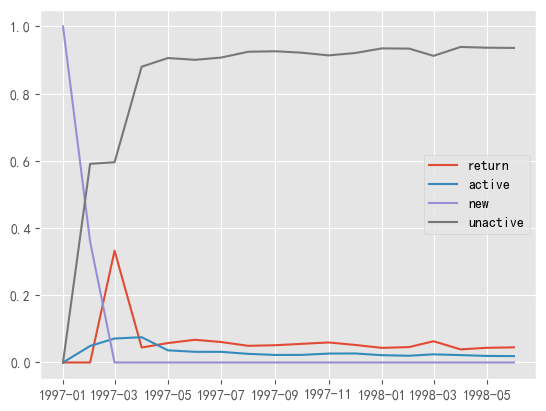

In [75]:
# rate.index = rate.index.to_timestamp()
# rate.index = pd.to_datetime(rate.index)
plt.plot(rate.index,rate['return'],label='return')
plt.plot(rate['active'],label='active')
plt.plot(rate['new'],label='new')
plt.plot(rate['unactive'],label='unactive')

plt.legend()

# 用户的购买周期

In [ ]:
# shift函数：将数据移动到指定的位置的函数
# eg: data,shift(axis=1) 会将所有的数据沿axis=1方向移动一个位置

In [16]:
# 计算购买周期
order_diff = df.groupby('customer_id').apply(lambda x: x['date']-x['date'].shift()) 
# 就是groupby后的每个组的数据都往下移动一行，用以计算每个消费者每次购买日期的差值（美中不足的是，如果用户有3次及以上的消费记录，就会得到一个用户的两次购买日期的差，而本次分析没有体现到这一点）
order_diff.describe()

C:\Users\29859\AppData\Local\Temp\ipykernel_11088\456934066.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order_diff = df.groupby('customer_id').apply(lambda x: x['date']-x['date'].shift())


count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: date, dtype: object

根据数据可以看出，平均购买周期是68天

<Axes: >

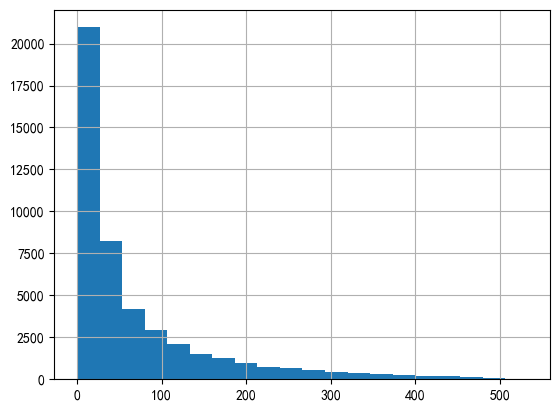

In [21]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
#np.timedelta64(1,'D')是一个NumPy的timedelta对象，表示1天。将order_diff中的每个日期差值除以这个1天的timedelta对象，将日期差值从timedelta转换为天数。
# 虽然上面的描述性统计中的值以及是用天数来表示了，但是经过验证，不除以一个np.timedelta64(1,'D')的话，是会报错

# 用户的生命周期
用户最后一次购买减去第一次购买日期

,min,max,life_period
customer_id,,,
1,1997-01-01,1997-01-01,0 days
2,1997-01-12,1997-01-12,0 days
3,1997-01-02,1998-05-28,511 days
4,1997-01-01,1997-12-12,345 days
5,1997-01-01,1998-01-03,367 days
...,...,...,...
23566,1997-03-25,1997-03-25,0 days
23567,1997-03-25,1997-03-25,0 days
23568,1997-03-25,1997-04-22,28 days


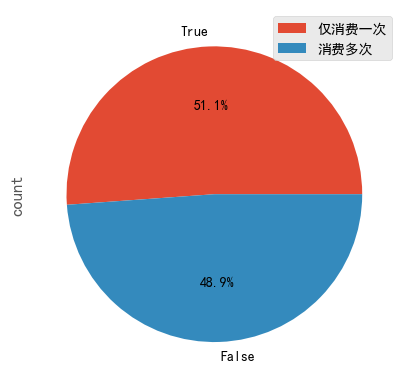

In [100]:
user_life= df.groupby('customer_id')['date'].agg(['min','max'])
(user_life['min']==user_life['max']).value_counts().plot(kind='pie',autopct='%1.1f%%') # 在图中加上具体的百分比并且保留一位小数
plt.legend(['仅消费一次','消费多次'])
user_life['life_period']=user_life['max']-user_life['min']
user_life

In [ ]:
# 绘制用户生命周期直方图

Text(0, 0.5, '用户数量')

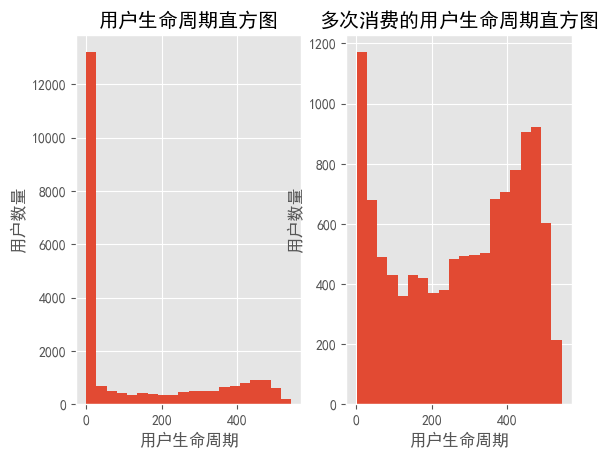

In [115]:
plt.subplot(121)
user_life['days']=user_life['life_period']/np.timedelta64(1,'D')
user_life['days'].hist(bins=20)
plt.title('用户生命周期直方图')
plt.xlabel('用户生命周期')
plt.ylabel('用户数量')
plt.subplot(122)
user_life[user_life['days']>0]['days'].hist(bins=20)
plt.title('多次消费的用户生命周期直方图')
plt.xlabel('用户生命周期')
plt.ylabel('用户数量')

# 复购率和回购率分析

## 复购率分析
其实这只是简单的计算用户在这一个月内是否复购了

C:\Users\29859\AppData\Local\Temp\ipykernel_13264\1752957968.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  purchase_r = piovt_count.iloc[:,:-1].applymap(lambda x:1 if x>1 else  np.NaN if x==0 else 0)


<Axes: xlabel='month'>

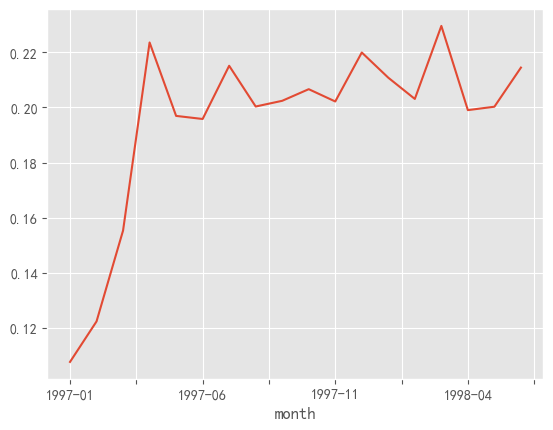

In [127]:
# 复购用户定义为1，非复购用户定义为0，没有消费用户定义为nan
purchase_r = piovt_count.iloc[:,:-1].applymap(lambda x:1 if x>1 else  np.NaN if x==0 else 0)
purchase_r.sum()/purchase_r.count()
(purchase_r.sum()/purchase_r.count()).plot()
